In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
results_df = pd.read_csv('results_celltypist.csv')

In [9]:
# training_error and testing_error * 100 for model == KNN
if results_df.loc[results_df['model'] == 'KNN', 'training_error'].to_numpy()[0] < 1:
    results_df.loc[results_df['model'] == 'KNN', 'training_error'] = results_df.loc[results_df['model'] == 'KNN', 'training_error'] * 100
    results_df.loc[results_df['model'] == 'KNN', 'testing_error'] = results_df.loc[results_df['model'] == 'KNN', 'testing_error'] * 100

In [16]:
results_df

,Unnamed: 0,fold,model,accuracy,f1,recall,time,training_error,testing_error
0,0,0,Proto_Net+disto_pl,0.923233,0.922972,0.923233,337.911525,6.535310,7.676739
1,0,0,Proto_Net+disto,0.922511,0.922112,0.922511,310.625938,6.510607,7.748910
2,0,0,Proto_Net+pl,0.922589,0.922373,0.922589,322.409405,6.469827,7.741065
3,0,0,Proto_Net,0.923750,0.923435,0.923750,298.306882,6.518841,7.624965
4,0,0,Net,0.923829,0.923677,0.923829,70.673636,6.818806,7.617120
5,0,0,Logistic Regression,0.919436,0.919096,0.919436,424.295645,7.632828,8.056418
6,0,0,KNN,0.892372,0.891387,0.892372,0.175715,7.677136,10.762810
7,0,1,Proto_Net+disto_pl,0.922087,0.921787,0.922087,333.160929,6.510607,7.791271
8,0,1,Proto_Net+disto,0.922448,0.922251,0.922448,309.328335,6.623927,7.755185
9,0,1,Proto_Net+pl,0.921099,0.920987,0.921099,320.256609,6.445908,7.890113


In [17]:
results_df_for_plot = pd.DataFrame(columns=['model', 'fold', 'data', 'type'])
for i in range(results_df.shape[0]):
    results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['accuracy'][i], 'type': 'accuracy'}, ignore_index=True)
    results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['f1'][i], 'type': 'f1'}, ignore_index=True)
    results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['training_error'][i], 'type': 'training_error'}, ignore_index=True)
    results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['testing_error'][i], 'type': 'testing_error'}, ignore_index=True)

/var/folders/hk/lwlgjk2975n6fqbwkl1b7ny40000gq/T/ipykernel_26061/243587240.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['accuracy'][i], 'type': 'accuracy'}, ignore_index=True)
/var/folders/hk/lwlgjk2975n6fqbwkl1b7ny40000gq/T/ipykernel_26061/243587240.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['f1'][i], 'type': 'f1'}, ignore_index=True)
/var/folders/hk/lwlgjk2975n6fqbwkl1b7ny40000gq/T/ipykernel_26061/243587240.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

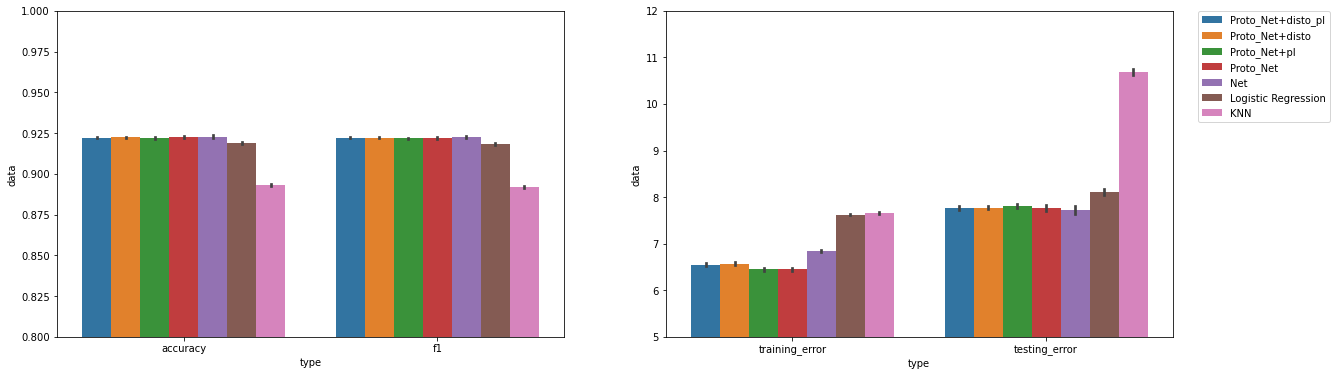

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(x='type', y='data', hue='model', data=results_df_for_plot[results_df_for_plot['type'].isin(['f1', 'accuracy'])], ax=ax1)
ax1.get_legend().remove()
ax1.set_ylim(0.8, 1)
sns.barplot(x='type', y='data', hue='model', data=results_df_for_plot[results_df_for_plot['type'].isin(['training_error', 'testing_error'])], ax=ax2)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_ylim(5, 12)
plt.show()

In [87]:
dist_df = pd.read_csv('dist_df_celltypist.csv')

In [99]:
# Group the dist_df by distance, model and fold, count the number
dist_df_grouped = dist_df.groupby(['distance', 'model']).size().reset_index(name='count')
dist_df_grouped_copy = dist_df_grouped.copy()

In [100]:
dist_df_grouped_nonzero = dist_df_grouped[dist_df_grouped['distance'] != 0]

In [101]:
# Calculate the weighted average of non-zero distance for each model
dist_df_grouped['weighted_average'] = dist_df_grouped['distance'] * dist_df_grouped['count']
dist_df_grouped = dist_df_grouped.groupby('model').sum().reset_index()
dist_df_grouped['weighted_average'] = dist_df_grouped['weighted_average'] / dist_df_grouped['count']

In [102]:
# Calculate the weighted average of non-zero distance for each model
dist_df_grouped_nonzero['weighted_average'] = dist_df_grouped_nonzero['distance'] * dist_df_grouped_nonzero['count']
dist_df_grouped_nonzero = dist_df_grouped_nonzero.groupby('model').sum().reset_index()
dist_df_grouped_nonzero['weighted_average'] = dist_df_grouped_nonzero['weighted_average'] / dist_df_grouped_nonzero['count']

In [103]:
dist_df_grouped

,model,distance,count,weighted_average
0,Net,27,318690,0.229863
1,knn,27,318690,0.322414
2,logistic,27,318690,0.242960
3,proto,27,318690,0.231548
4,proto_disto,27,318690,0.231156
5,proto_disto_pl,27,318690,0.231400
6,proto_pl,27,318690,0.232712


In [104]:
dist_df_grouped_nonzero

,model,distance,count,weighted_average
0,Net,27,24583,2.979905
1,knn,27,34068,3.016027
2,logistic,27,25865,2.993582
3,proto,27,24752,2.981254
4,proto_disto,27,24768,2.974281
5,proto_disto_pl,27,24779,2.976109
6,proto_pl,27,24886,2.980109


In [105]:
# all_models = ['Proto_Net+disto_pl', 'Proto_Net+disto', 'Proto_Net+pl', 'Proto_Net', 'Net', 'Logistic Regression', 'KNN']
all_models = ['proto_disto_pl', 'proto_pl', 'proto_disto', 'proto', 'Net', 'logistic', 'knn']

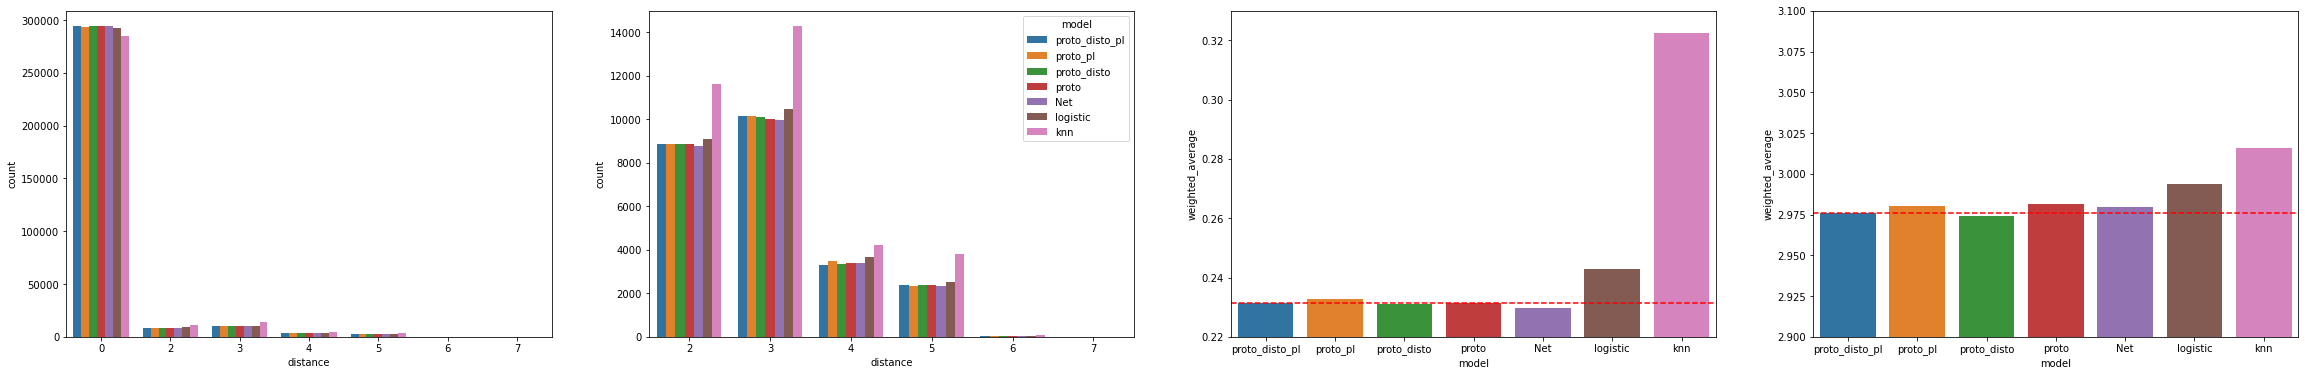

In [111]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(40, 6))
sns.barplot(x='distance', y='count', hue='model', data=dist_df_grouped_copy, hue_order=all_models, ax=ax1)
ax1.get_legend().remove()
sns.barplot(x='distance', y='count', hue='model', data=dist_df_grouped_copy[dist_df_grouped_copy['distance'] > 0], hue_order=all_models, ax=ax2)
# ax2.get_legend().remove()
sns.barplot(x='model', y='weighted_average', data=dist_df_grouped, order=all_models, ax=ax3)
ax3.set_ylim(0.22, 0.33)
ax3.axhline(y=dist_df_grouped.loc[dist_df_grouped['model'] == 'proto_disto_pl', 'weighted_average'].to_numpy()[0], color='r', linestyle='--')
# ax3.get_legend().remove()
sns.barplot(x='model', y='weighted_average', data=dist_df_grouped_nonzero, order=all_models, ax=ax4)
ax4.set_ylim(2.9, 3.1)
ax4.axhline(y=dist_df_grouped_nonzero.loc[dist_df_grouped_nonzero['model'] == 'proto_disto_pl', 'weighted_average'].to_numpy()[0], color='r', linestyle='--')
# ax4.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()